In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('../data/training_data.csv')

# Function to plot a feature against bike demand
"""def plot_feature_vs_demand(data, feature, title):
    plt.figure(figsize=(12, 6))
    sns.countplot(x=feature, hue='increase_stock', data=data)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()"""

"def plot_feature_vs_demand(data, feature, title):\n    plt.figure(figsize=(12, 6))\n    sns.countplot(x=feature, hue='increase_stock', data=data)\n    plt.title(title)\n    plt.xticks(rotation=45)\n    plt.show()"

In [3]:
data.head()

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility,increase_stock
0,5,5,1,0,0,0,-7.2,-15.0,53.68,0.0,0,0.0,16.3,31.6,16.0,low_bike_demand
1,21,4,1,0,1,0,-1.3,-12.8,40.97,0.0,0,0.0,23.9,85.7,16.0,low_bike_demand
2,21,3,8,0,1,1,26.9,21.8,73.39,0.0,0,0.0,0.0,81.1,16.0,low_bike_demand
3,1,6,1,0,0,0,3.1,-4.0,59.74,0.0,0,0.0,19.2,0.0,16.0,low_bike_demand
4,17,0,3,0,1,0,11.7,-11.4,18.71,0.0,0,0.0,10.5,44.6,16.0,low_bike_demand


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hour_of_day     1600 non-null   int64  
 1   day_of_week     1600 non-null   int64  
 2   month           1600 non-null   int64  
 3   holiday         1600 non-null   int64  
 4   weekday         1600 non-null   int64  
 5   summertime      1600 non-null   int64  
 6   temp            1600 non-null   float64
 7   dew             1600 non-null   float64
 8   humidity        1600 non-null   float64
 9   precip          1600 non-null   float64
 10  snow            1600 non-null   int64  
 11  snowdepth       1600 non-null   float64
 12  windspeed       1600 non-null   float64
 13  cloudcover      1600 non-null   float64
 14  visibility      1600 non-null   float64
 15  increase_stock  1600 non-null   object 
dtypes: float64(8), int64(7), object(1)
memory usage: 200.1+ KB


In [5]:
data

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility,increase_stock
0,5,5,1,0,0,0,-7.2,-15.0,53.68,0.000,0,0.0,16.3,31.6,16.0,low_bike_demand
1,21,4,1,0,1,0,-1.3,-12.8,40.97,0.000,0,0.0,23.9,85.7,16.0,low_bike_demand
2,21,3,8,0,1,1,26.9,21.8,73.39,0.000,0,0.0,0.0,81.1,16.0,low_bike_demand
3,1,6,1,0,0,0,3.1,-4.0,59.74,0.000,0,0.0,19.2,0.0,16.0,low_bike_demand
4,17,0,3,0,1,0,11.7,-11.4,18.71,0.000,0,0.0,10.5,44.6,16.0,low_bike_demand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,3,5,6,0,0,1,21.5,19.4,87.68,0.000,0,0.0,10.6,24.4,16.0,low_bike_demand
1596,14,0,6,0,1,1,23.2,20.1,82.43,2.217,0,0.0,9.8,92.1,10.4,low_bike_demand
1597,13,0,3,0,1,1,13.9,-2.2,32.93,0.000,0,2.0,18.2,79.3,16.0,low_bike_demand
1598,14,5,3,0,0,1,11.7,-9.3,22.09,0.000,0,0.0,5.8,24.4,16.0,high_bike_demand


In [6]:
data.shape

(1600, 16)

In [7]:
data.describe()

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility
count,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000,1600.0,1600.000000,1600.000000,1600.000000,1600.000000
mean,11.37125,3.022500,6.468750,0.033125,0.710000,0.64375,15.210313,7.750750,63.927844,0.122042,0.0,0.042713,13.082500,64.322375,15.344125
std,6.94837,2.012965,3.454741,0.179019,0.453904,0.47904,9.264785,10.026459,19.079419,0.920600,0.0,0.421198,7.756652,32.748869,2.323737
min,0.00000,0.000000,1.000000,0.000000,0.000000,0.00000,-9.100000,-18.400000,15.850000,0.000000,0.0,0.000000,0.000000,0.000000,0.100000
25%,5.00000,1.000000,3.000000,0.000000,0.000000,0.00000,7.700000,-0.800000,47.845000,0.000000,0.0,0.000000,7.500000,28.800000,16.000000
50%,12.00000,3.000000,6.000000,0.000000,1.000000,1.00000,15.500000,8.300000,65.175000,0.000000,0.0,0.000000,12.300000,79.300000,16.000000
75%,17.00000,5.000000,9.000000,0.000000,1.000000,1.00000,23.200000,16.800000,79.955000,0.000000,0.0,0.000000,17.600000,92.800000,16.000000
max,23.00000,6.000000,12.000000,1.000000,1.000000,1.00000,35.600000,24.300000,99.890000,25.871000,0.0,6.710000,43.800000,100.000000,16.000000


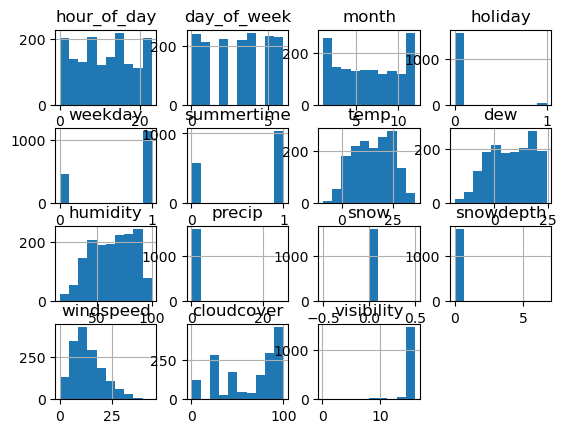

In [8]:
_ = data.hist()

In [9]:
data["increase_stock"].value_counts()

increase_stock
low_bike_demand     1312
high_bike_demand     288
Name: count, dtype: int64

In [10]:
# What percentage of the labels claim "high_bike_demand"?
print(data["increase_stock"].value_counts())
percentage_high_bike_demand = np.sum([1 if row == "high_bike_demand" else 0 for row in data["increase_stock"]]) / data.shape[0]
print(f"percentage: {percentage_high_bike_demand}")

increase_stock
low_bike_demand     1312
high_bike_demand     288
Name: count, dtype: int64
percentage: 0.18


c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

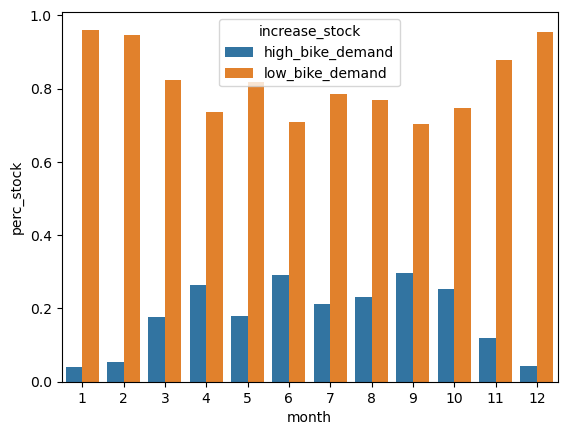

In [11]:
# Percentage of high/low bike demand per month
data_time = data[["month", "hour_of_day","day_of_week","increase_stock"]]
df_month = data_time.groupby(['month', "increase_stock"]).count().reset_index().drop(columns =["day_of_week"])
df_help = data_time["month"].value_counts().reset_index()
df_month = pd.merge(df_month,df_help,left_on= df_month["month"], right_on= df_help["month"], how = "inner").drop(columns =["month_y","key_0"])
df_month = df_month.rename(columns={"hour_of_day": "count_stock","count":"count_month","month_x":"month"})
df_month["perc_stock"] = df_month["count_stock"] / df_month["count_month"]
_ = sns.barplot(data = df_month, x="month",y="perc_stock", hue = "increase_stock")


In [12]:
data.groupby(by=["hour_of_day","increase_stock"]).count()
#sns.countplot(data = data, x="summertime", hue = "increase_stock")

day_of_week  month  holiday  weekday  \
hour_of_day increase_stock                                           
0           low_bike_demand            84     84       84       84   
1           low_bike_demand            67     67       67       67   
2           low_bike_demand            53     53       53       53   
3           low_bike_demand            69     69       69       69   
4           low_bike_demand            69     69       69       69   
5           low_bike_demand            67     67       67       67   
6           low_bike_demand            62     62       62       62   
7           high_bike_demand            2      2        2        2   
            low_bike_demand            75     75       75       75   
8           high_bike_demand           13     13       13       13   
            low_bike_demand            53     53       53       53   
9           high_bike_demand           11     11       11       11   
            low_bike_demand            52     52       52       52   
10          high_bike_demand           10     10       10       10   
            low_bike_demand            53     53       53       53   
11          high_bike_demand           13     13       13       13   
            low_bike_demand            45     45       45       45   
12          high_bike_demand           20     20       20       20   
            low_bike_demand            46     46       46       46   
13          high_bike_demand           17     17       17       17   
            low_bike_demand            61     61       61       61   
14          high_bike_demand           18     18       18       18   
            low_bike_demand            52     52       52       52   
15          high_bike_demand           33     33       33       33   
            low_bike_demand            31     31       31       31   
16          high_bike_demand           39     39       39       39   
            low_bike_demand            44     44       44       44   
17          high_bike_demand           43     43       43       43   
            low_bike_demand            29     29       29       29   
18          high_bike_demand           39     39       39       39   
            low_bike_demand            14     14       14       14   
19          high_bike_demand           25     25       25       25   
            low_bike_demand            32     32       32       32   
20          high_bike_demand            4      4        4        4   
            low_bike_demand            51     51       51       51   
21          low_bike_demand            71     71       71       71   
22          high_bike_demand            1      1        1        1   
            low_bike_demand            55     55       55       55   
23          low_bike_demand            77     77       77       77   

                              summertime  temp  dew  humidity  precip  snow  \
hour_of_day increase_stock                                                    
0           low_bike_demand           84    84   84        84      84    84   
1           low_bike_demand           67    67   67        67      67    67   
2           low_bike_demand           53    53   53        53      53    53   
3           low_bike_demand           69    69   69        69      69    69   
4           low_bike_demand           69    69   69        69      69    69   
5           low_bike_demand           67    67   67        67      67    67   
6           low_bike_demand           62    62   62        62      62    62   
7           high_bike_demand           2     2    2         2       2     2   
            low_bike_demand           75    75   75        75      75    75   
8           high_bike_demand          13    13   13        13      13    13   
            low_bike_demand           53    53   53        53      53    53   
9           high_bike_demand          11    11   11        11      11    11   
            low_bike_demand           52    52   52  

c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

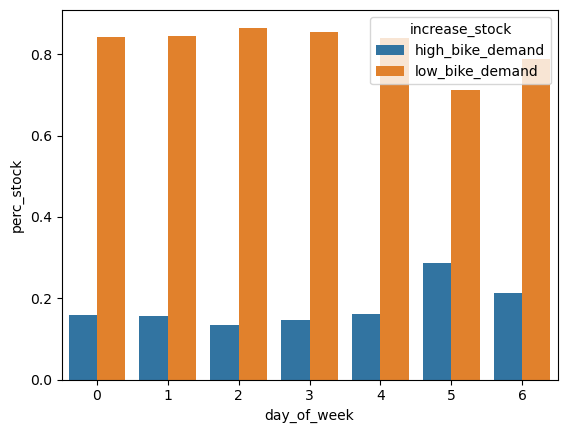

In [13]:
# Percentage of high/low bike demand day of the week
df_weekday = data_time.groupby(['day_of_week', "increase_stock"]).count().reset_index().drop(columns =["month"])
df_help = data_time["day_of_week"].value_counts().reset_index()
df_weekday = pd.merge(df_weekday,df_help,left_on= df_weekday["day_of_week"], right_on= df_help["day_of_week"], how = "inner").drop(columns =["day_of_week_y","key_0"])
df_weekday = df_weekday.rename(columns={"hour_of_day": "count_stock","count":"count_weekday","day_of_week_x":"day_of_week"})
df_weekday["perc_stock"] = df_weekday["count_stock"] / df_weekday["count_weekday"]
_ = sns.barplot(data = df_weekday, x="day_of_week",y="perc_stock", hue = "increase_stock")


c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

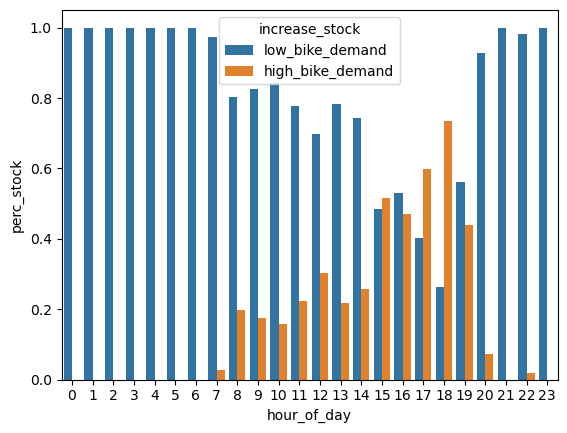

In [14]:
# Percentage of high/low bike demand hour of the day
df_hour = data_time.groupby(['hour_of_day', "increase_stock"]).count().reset_index().drop(columns =["month"])
df_help = data_time["hour_of_day"].value_counts().reset_index()
df_hour = pd.merge(df_hour,df_help,left_on= df_hour["hour_of_day"], right_on= df_help["hour_of_day"], how = "inner").drop(columns =["hour_of_day_y","key_0"])
df_hour = df_hour.rename(columns={"day_of_week": "count_stock","count":"count_hour","hour_of_day_x":"hour_of_day"})
df_hour["perc_stock"] = df_hour["count_stock"] / df_hour["count_hour"]
_ = sns.barplot(data = df_hour, x="hour_of_day",y="perc_stock", hue = "increase_stock")


In [15]:
# Percentage of high/low bike demand day of the week
df_hourday = data_time.groupby(['day_of_week','hour_of_day', "increase_stock"]).count().reset_index()
df_hourday = df_hourday.rename(columns={"month":"count"})

#df_help = data_time[['day_of_week','hour_of_day']].value_counts().reset_index()
#df_weekday = pd.merge(df_weekday,df_help,left_on= df_weekday["day_of_week"], right_on= df_help["day_of_week"], how = "inner").drop(columns =["day_of_week_y","key_0"])
#df_weekday = df_weekday.rename(columns={"hour_of_day": "count_stock","count":"count_weekday","day_of_week_x":"day_of_week"})
#df_weekday["perc_stock"] = df_weekday["count_stock"] / df_weekday["count_weekday"]
#_ = sns.barplot(data = df_weekday, x="day_of_week",y="perc_stock", hue = "increase_stock")

c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

<Axes: xlabel='hour_of_day', ylabel='count'>

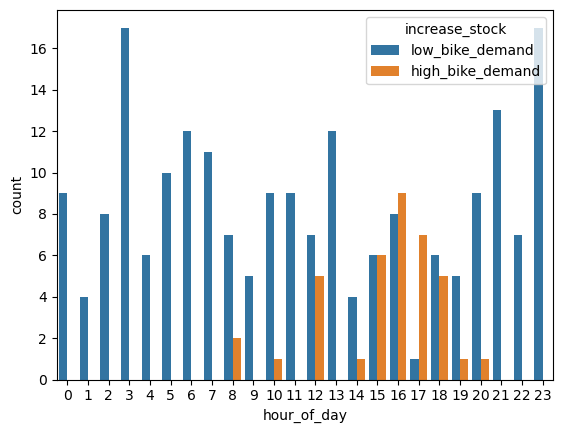

In [16]:
sns.barplot(data = df_hourday[df_hourday["day_of_week"] ==0], x="hour_of_day",y="count", hue = "increase_stock")

c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

<Axes: xlabel='hour_of_day', ylabel='count'>

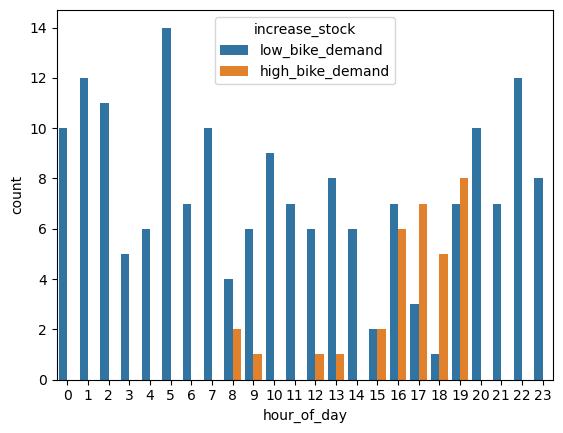

In [17]:
sns.barplot(data = df_hourday[df_hourday["day_of_week"] ==1], x="hour_of_day",y="count", hue = "increase_stock")

c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

<Axes: xlabel='hour_of_day', ylabel='count'>

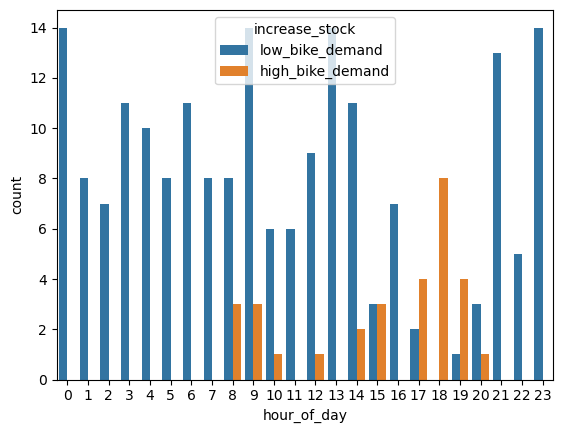

In [18]:
sns.barplot(data = df_hourday[df_hourday["day_of_week"] ==2], x="hour_of_day",y="count", hue = "increase_stock")

c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

<Axes: xlabel='hour_of_day', ylabel='count'>

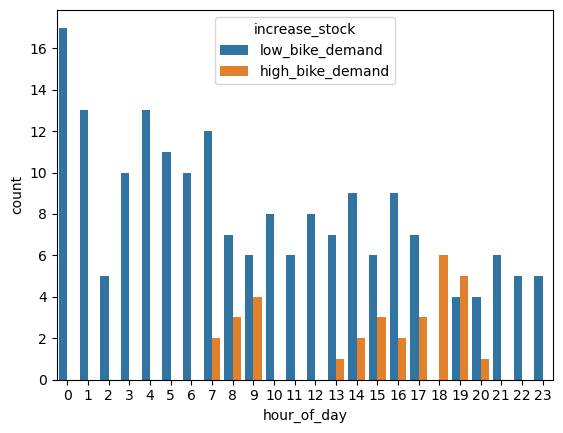

In [19]:
sns.barplot(data = df_hourday[df_hourday["day_of_week"] ==3], x="hour_of_day",y="count", hue = "increase_stock")

c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

<Axes: xlabel='hour_of_day', ylabel='count'>

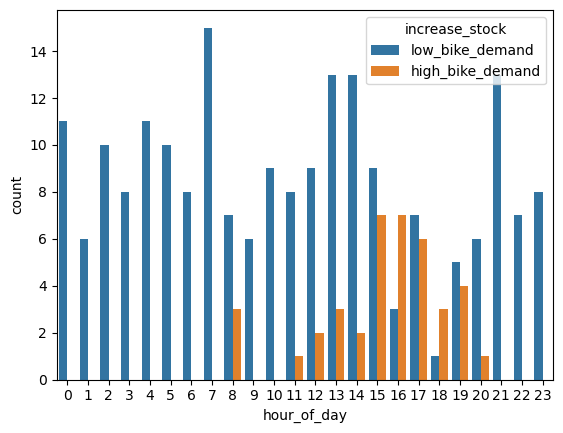

In [20]:
sns.barplot(data = df_hourday[df_hourday["day_of_week"] ==4], x="hour_of_day",y="count", hue = "increase_stock")

c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

<Axes: xlabel='hour_of_day', ylabel='count'>

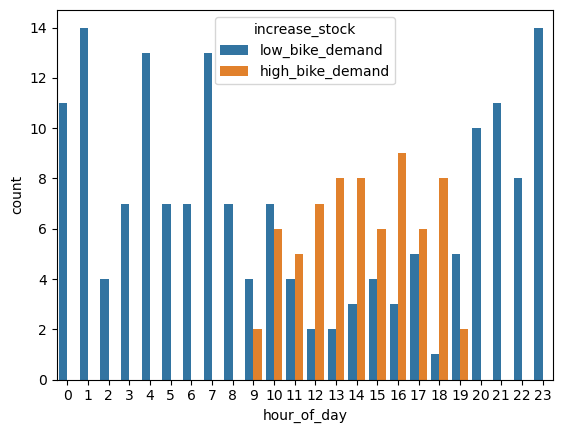

In [21]:
sns.barplot(data = df_hourday[df_hourday["day_of_week"] ==5], x="hour_of_day",y="count", hue = "increase_stock")

c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

<Axes: xlabel='hour_of_day', ylabel='count'>

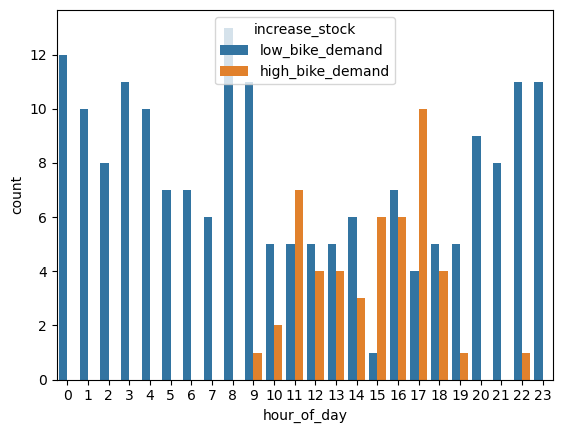

In [22]:
sns.barplot(data = df_hourday[df_hourday["day_of_week"] ==6], x="hour_of_day",y="count", hue = "increase_stock")

In [23]:
# Load new data set with new features
data_copy = pd.read_csv('../data/data_copy.csv',index_col=[0])
data_copy["increase_stock"].replace(('high_bike_demand', 'low_bike_demand'), (1, 0), inplace=True)


In [24]:
data_copy.iloc[:4]

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snowdepth,windspeed,cloudcover,visibility,increase_stock,daytime,rushhour,weather_score,weather_score_daytime
0,5,5,1,0,0,0,-7.2,-15.0,53.68,0.0,0.0,16.3,31.6,16.0,0,0,0,-0.141957,-0.0
1,21,4,1,0,1,0,-1.3,-12.8,40.97,0.0,0.0,23.9,85.7,16.0,0,0,0,0.075260,0.0
2,21,3,8,0,1,1,26.9,21.8,73.39,0.0,0.0,0.0,81.1,16.0,0,0,0,0.261261,0.0
3,1,6,1,0,0,0,3.1,-4.0,59.74,0.0,0.0,19.2,0.0,16.0,0,0,0,-0.050008,-0.0


In [25]:
data_copy["increase_stock"].replace(('high_bike_demand', 'low_bike_demand'), (1, 0), inplace=True)
data_copy.corr()

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snowdepth,windspeed,cloudcover,visibility,increase_stock,daytime,rushhour,weather_score,weather_score_daytime
hour_of_day,1.000000,-0.005963,-0.016503,0.012732,-0.028899,0.005376,0.157994,-0.023067,-0.325988,-0.008747,-0.006031,0.161313,0.002672,0.012115,0.240544,0.242792,0.402482,0.348048,0.289222
day_of_week,-0.005963,1.000000,-0.032363,-0.128759,-0.786150,0.010263,0.003727,0.014271,0.016976,-0.011158,-0.045930,0.033726,0.043354,-0.018810,0.083688,0.023960,-0.000309,-0.011015,-0.003827
month,-0.016503,-0.032363,1.000000,-0.016021,0.049254,0.046929,0.207436,0.272927,0.173159,0.004232,-0.127751,-0.207056,-0.083544,0.028287,0.037212,-0.015555,-0.003680,-0.012658,-0.021195
holiday,0.012732,-0.128759,-0.016021,1.000000,0.118294,-0.132132,-0.055069,-0.060239,-0.017260,-0.005564,-0.013385,-0.019129,0.014093,-0.028171,-0.004909,0.015294,0.026803,-0.012785,-0.001526
weekday,-0.028899,-0.786150,0.049254,0.118294,1.000000,-0.023872,0.007433,0.009804,0.016758,0.029214,0.024333,-0.024126,0.008788,-0.011815,-0.116446,-0.001936,-0.008827,0.007414,0.010801
summertime,0.005376,0.010263,0.046929,-0.132132,-0.023872,1.000000,0.707637,0.645944,0.064755,0.012930,-0.127991,-0.028827,-0.022964,0.068963,0.216052,-0.010645,0.029729,0.450464,0.264502
temp,0.157994,0.003727,0.207436,-0.055069,0.007433,0.707637,1.000000,0.871536,0.008306,-0.003313,-0.153692,-0.037656,-0.012421,0.119909,0.336981,0.141392,0.204051,0.702599,0.503076
dew,-0.023067,0.014271,0.272927,-0.060239,0.009804,0.645944,0.871536,1.000000,0.489590,0.071566,-0.119660,-0.190793,0.146844,-0.050474,0.132663,-0.018985,0.000957,0.276600,0.121739
humidity,-0.325988,0.016976,0.173159,-0.017260,0.016758,0.064755,0.008306,0.489590,1.000000,0.174768,0.033598,-0.340557,0.331976,-0.376796,-0.308726,-0.275595,-0.333844,-0.643688,-0.595148
precip,-0.008747,-0.011158,0.004232,-0.005564,0.029214,0.012930,-0.003313,0.071566,0.174768,1.000000,0.011242,0.060778,0.126660,-0.455058,-0.059304,0.010033,0.002245,-0.123647,-0.080598


In [26]:
def get_top_correlations_blog(df, threshold=0.4):
    """
    df: the dataframe to get correlations from
    threshold: the maximum and minimum value to include for correlations. For eg, if this is 0.4, only pairs haveing a correlation coefficient greater than 0.4 or less than -0.4 will be included in the results. 
    """
    orig_corr = df.corr()
    c = orig_corr.abs()

    so = c.unstack()
    
    print("|    Variable 1    |    Variable 2    | Correlation Coefficient    |")
    print("|------------------|------------------|----------------------------|")
    
    i=0
    pairs=set()
    result = pd.DataFrame()
    for index, value in so.sort_values(ascending=False).items():        #iteritems():
        # Exclude duplicates and self-correlations
        if value > threshold \
        and index[0] != index[1] \
        and (index[0], index[1]) not in pairs \
        and (index[1], index[0]) not in pairs:
            
            print(f'|    {index[0]}    |    {index[1]}    |    {orig_corr.loc[(index[0], index[1])]}    |')
            result.loc[i, ['Variable 1', 'Variable 2', 'Correlation Coefficient']] = [index[0], index[1], orig_corr.loc[(index[0], index[1])]]
            pairs.add((index[0], index[1]))
            i+=1
    return result.reset_index(drop=True).set_index(['Variable 1', 'Variable 2'])

In [27]:
get_top_correlations_blog(data_copy)

|    Variable 1    |    Variable 2    | Correlation Coefficient    |
|------------------|------------------|----------------------------|
|    temp    |    dew    |    0.8715360995666404    |
|    weather_score_daytime    |    weather_score    |    0.8358062353774364    |
|    weekday    |    day_of_week    |    -0.7861495404789236    |
|    temp    |    summertime    |    0.7076370409558344    |
|    weather_score    |    temp    |    0.7025991339937356    |
|    dew    |    summertime    |    0.6459442194399784    |
|    humidity    |    weather_score    |    -0.6436883542888202    |
|    weather_score_daytime    |    daytime    |    0.6160513921498998    |
|    humidity    |    weather_score_daytime    |    -0.5951478299737353    |
|    increase_stock    |    weather_score_daytime    |    0.5795211190154589    |
|    rushhour    |    weather_score_daytime    |    0.5496502158118669    |
|    weather_score_daytime    |    temp    |    0.5030758297391703    |
|    dew    |    humidity

C:\Users\Ellaa\AppData\Local\Temp\ipykernel_27684\3136200794.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'temp' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  result.loc[i, ['Variable 1', 'Variable 2', 'Correlation Coefficient']] = [index[0], index[1], orig_corr.loc[(index[0], index[1])]]
C:\Users\Ellaa\AppData\Local\Temp\ipykernel_27684\3136200794.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'dew' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  result.loc[i, ['Variable 1', 'Variable 2', 'Correlation Coefficient']] = [index[0], index[1], orig_corr.loc[(index[0], index[1])]]


,,Correlation Coefficient
Variable 1,Variable 2,
temp,dew,0.871536
weather_score_daytime,weather_score,0.835806
weekday,day_of_week,-0.786150
temp,summertime,0.707637
weather_score,temp,0.702599
dew,summertime,0.645944
humidity,weather_score,-0.643688
weather_score_daytime,daytime,0.616051
humidity,weather_score_daytime,-0.595148


c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='dew_temp', ylabel='temp'>

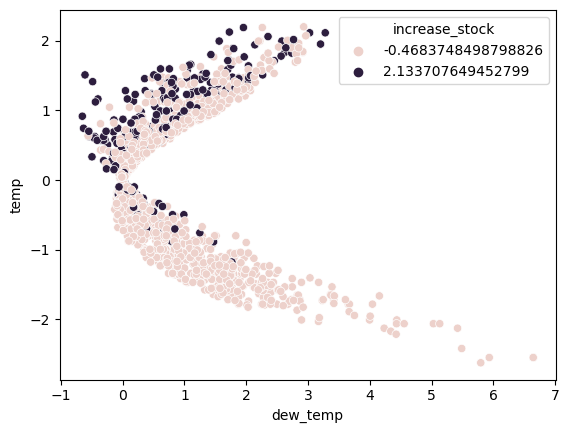

In [28]:
data_new = data_copy.copy()

data_scaled = (data_new-data_new.mean())/data_new.std()

data_scaled["dew2"] = data_scaled["dew"]**2
data_scaled["temp2"] = data_scaled["temp"]**2
data_scaled["dew_temp"] = data_scaled["dew"]*data_scaled["temp"]

sns.scatterplot(data=data_scaled,x="dew_temp", y = "temp", hue = "increase_stock")

In [29]:
data_scaled.iloc[:4]

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,...,cloudcover,visibility,increase_stock,daytime,rushhour,weather_score,weather_score_daytime,dew2,temp2,dew_temp
0,-0.916942,0.982382,-1.582970,-0.185036,-1.564208,-1.343833,-2.418870,-2.269071,-0.537115,-0.132568,...,-0.999191,0.28225,-0.468375,-1.091346,-0.508615,-1.746710,-0.672325,5.148684,5.850934,5.488589
1,1.385757,0.485602,-1.582970,-0.185036,0.638902,-1.343833,-1.782050,-2.049652,-1.203278,-0.132568,...,0.652774,0.28225,-0.468375,-1.091346,-0.508615,-0.568242,-0.672325,4.201073,3.175703,3.652583
2,1.385757,-0.011178,0.443232,-0.185036,0.638902,0.743675,1.261733,1.401218,0.495935,-0.132568,...,0.512312,0.28225,-0.468375,-1.091346,-0.508615,0.440865,-0.672325,1.963411,1.591971,1.767963
3,-1.492616,1.479162,-1.582970,-0.185036,-1.564208,-1.343833,-1.307134,-1.171974,-0.219495,-0.132568,...,-1.964110,0.28225,-0.468375,-1.091346,-0.508615,-1.247860,-0.672325,1.373523,1.708599,1.531927


In [30]:
get_top_correlations_blog(data_scaled)

|    Variable 1    |    Variable 2    | Correlation Coefficient    |
|------------------|------------------|----------------------------|
|    dew_temp    |    temp2    |    0.8772651003688905    |
|    dew_temp    |    dew2    |    0.8717329776698456    |
|    dew    |    temp    |    0.8715360995666401    |
|    weather_score    |    weather_score_daytime    |    0.8358062353774351    |
|    day_of_week    |    weekday    |    -0.7861495404789227    |
|    summertime    |    temp    |    0.7076370409558336    |
|    temp    |    weather_score    |    0.7025991339937353    |
|    dew    |    summertime    |    0.6459442194399778    |
|    weather_score    |    humidity    |    -0.643688354288821    |
|    weather_score_daytime    |    daytime    |    0.6160513921498991    |
|    dew2    |    temp2    |    0.5977181593986849    |
|    humidity    |    weather_score_daytime    |    -0.595147829973736    |
|    weather_score_daytime    |    increase_stock    |    0.5795211190154582    |


C:\Users\Ellaa\AppData\Local\Temp\ipykernel_27684\3136200794.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'dew_temp' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  result.loc[i, ['Variable 1', 'Variable 2', 'Correlation Coefficient']] = [index[0], index[1], orig_corr.loc[(index[0], index[1])]]
C:\Users\Ellaa\AppData\Local\Temp\ipykernel_27684\3136200794.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'temp2' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  result.loc[i, ['Variable 1', 'Variable 2', 'Correlation Coefficient']] = [index[0], index[1], orig_corr.loc[(index[0], index[1])]]


Correlation Coefficient
Variable 1            Variable 2                                    
dew_temp              temp2                                 0.877265
                      dew2                                  0.871733
dew                   temp                                  0.871536
weather_score         weather_score_daytime                 0.835806
day_of_week           weekday                              -0.786150
summertime            temp                                  0.707637
temp                  weather_score                         0.702599
dew                   summertime                            0.645944
weather_score         humidity                             -0.643688
weather_score_daytime daytime                               0.616051
dew2                  temp2                                 0.597718
humidity              weather_score_daytime                -0.595148
weather_score_daytime increase_stock                        0.579521
                      rushhour                              0.549650
                      temp                                  0.503076
humidity              dew                                   0.489590
increase_stock        rushhour                              0.482137
                      weather_score                         0.479621
rushhour              daytime                               0.466044
precip                visibility                           -0.455058
summertime            weather_score                         0.450464
weather_score         rushhour                              0.419673
daytime               increase_stock                        0.412841
rushhour              hour_of_day                           0.402482

c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

<Axes: xlabel='dew', ylabel='temp'>

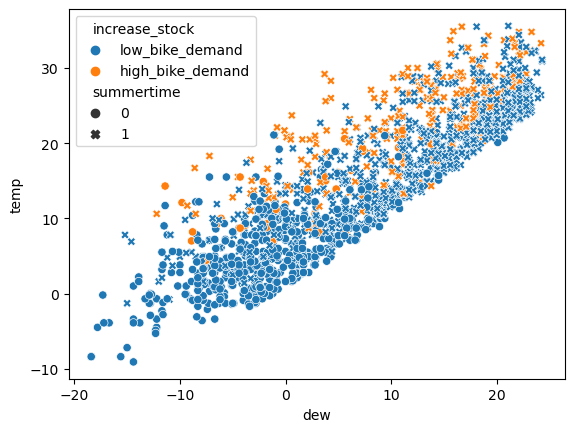

In [31]:
sns.scatterplot(data=data,x="dew",y="temp", hue= "increase_stock",style = "summertime") # hue = "increase_stock")
#sns.scatterplot(data=data[data["summertime"] == 0],x="dew",y="temp",hue = "increase_stock")

In [32]:
data_scaled["summertime"]

0      -1.343833
1      -1.343833
2       0.743675
3      -1.343833
4      -1.343833
          ...   
1595    0.743675
1596    0.743675
1597    0.743675
1598    0.743675
1599   -1.343833
Name: summertime, Length: 1600, dtype: float64

c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

<Axes: xlabel='precip', ylabel='count'>

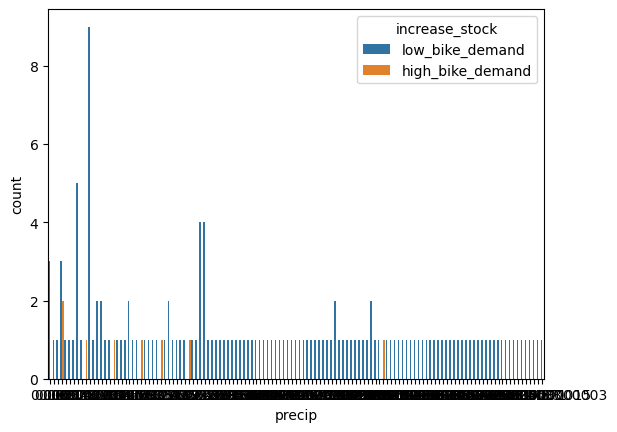

In [33]:
sns.countplot(data=data[data["precip"]!=0],x = "precip",hue = "increase_stock")

c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

<Axes: xlabel='snowdepth', ylabel='count'>

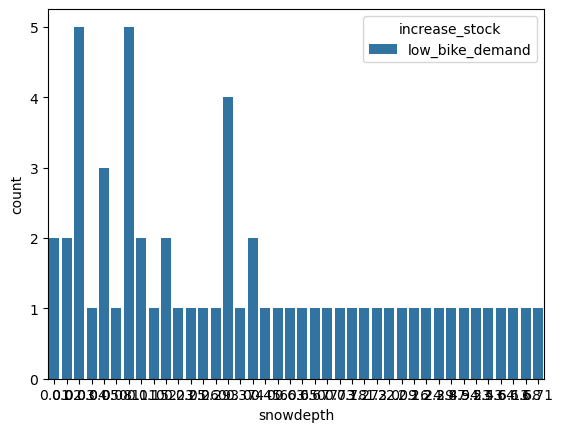

In [34]:
sns.countplot(data=data[data["snowdepth"]!=0],x = "snowdepth",hue = "increase_stock")

c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

<Axes: xlabel='humidity', ylabel='temp'>

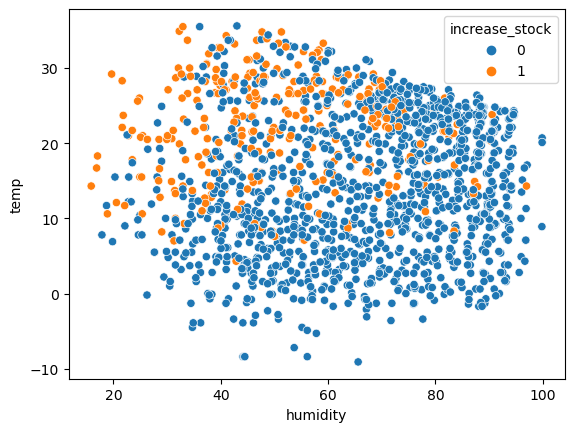

In [35]:
sns.scatterplot(data=data_new,x="humidity",y="temp", hue= "increase_stock") # hue = "increase_stock")


c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

<Axes: xlabel='humidity2', ylabel='temp2'>

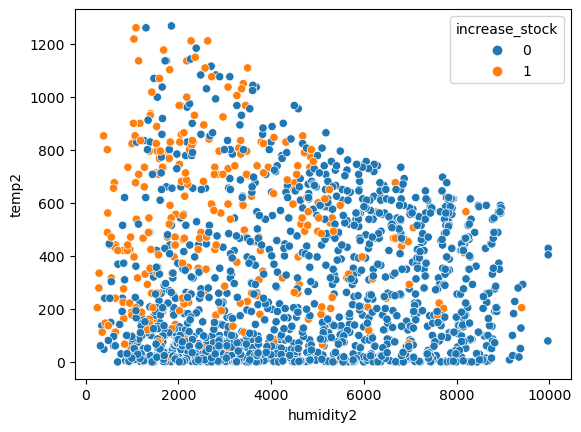

In [36]:
data_new["humidity2"] = data_new["humidity"]**2
data_new["temp2"] = data_new["temp"]**2
data_new["humidity_temp"] = data_new["humidity2"]*data_scaled["temp2"]

sns.scatterplot(data=data_new,x="humidity2",y="temp2", hue= "increase_stock") # hue = "increase_stock")


In [37]:
data[data["snowdepth"]!= 0].count()[0]

C:\Users\Ellaa\AppData\Local\Temp\ipykernel_27684\3051955464.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data[data["snowdepth"]!= 0].count()[0]


58

In [38]:
data[data["snow"]!= 0].count()[0]

C:\Users\Ellaa\AppData\Local\Temp\ipykernel_27684\3705741435.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data[data["snow"]!= 0].count()[0]


0

In [39]:
data[data["precip"]!= 0].count()[0]

C:\Users\Ellaa\AppData\Local\Temp\ipykernel_27684\528393817.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data[data["precip"]!= 0].count()[0]


155

In [41]:
data["increase_stock"].value_counts()

increase_stock
low_bike_demand     1312
high_bike_demand     288
Name: count, dtype: int64

In [42]:
1312/1600


0.82